In [47]:
# imports of the packages
import matplotlib.pyplot as plt
import numpy as np
from optscan import get_path_statistics, create_scan_grid, find_good_path

In [48]:
# initializing parameters
params = dict()

#### Edit session ####
params['hrange'] = 20 # horizontal range in microns
params['vrange'] = 20 # vertical range in microns
params['hspeed'] = 100 # in microns/s
params['vspeed'] = 100 # in microns/s
params['step_size'] = 2 # step size in microns
params['central_point'] = True
params['center']  = (0,0) # center of the scan
params['scangrid'] = 'ROUND_ROI' # grid type
params['expo_time'] = 0.1 # exposure time per point in seconds
params['overhead_time'] = 0.15 # possible overhead in seconds
######################

In [49]:
## Before optimization
print('Creating scan grid')
datai = create_scan_grid(**params)
pl = datai['locations']
pc = len(pl)
# Calculates Statistics : paths lengths and time
ph, pv, pt = get_path_statistics(pl, params['hspeed'], params['vspeed'])
Tt = pt + pc*(params['expo_time'] + params['overhead_time']) # total time
# print results
# before
print('\n#---------------------------------#')
print('#      Before optimization        #')
print('#---------------------------------#')
print('Point counts: {:d}'.format(pc))
print('Path horizontal length: {:.03f} microns'.format(ph))
print('Path Vertical length: {:.03f} microns'.format(pv))
print('Path total time: {:.02f} s'.format(pt))
print('Total time: {:.02f} s'.format(Tt))
print('#---------------------------------#\n')

Creating scan grid
Doing Round_roi calculation with parameteres:
hrz_range=20, vrt_range=20, step_size=2
The scan grid contains 83 points

#---------------------------------#
#      Before optimization        #
#---------------------------------#
Point counts: 83
Path horizontal length: 147.232 microns
Path Vertical length: 166.729 microns
Path total time: 2.33 s
Total time: 23.08 s
#---------------------------------#



In [50]:
## Optimization with Euclidean distance
print('Starting optimization')
# Euclidean distance
print('Using Euclidean distance')
params['distance_method'] = 'Euclidean'
datae = find_good_path(datai,params['distance_method'],params['hspeed'], params['vspeed'])
plopte = datae['trajectory']
pcopte = len(plopte)
# Calculates Statistics : paths lengths and time
phopte, pvopte, ptopte = get_path_statistics(plopte, params['hspeed'], params['vspeed'])
Ttopte = ptopte + pcopte*(params['expo_time'] + params['overhead_time'])
# after optimization (Euclidean)
print('#---------------------------------#')
print('# After optimization - Euclidean  #')
print('#---------------------------------#')
print('Point counts: {:d}'.format(pcopte))
print('Path horizontal length: {:.03f} microns'.format(phopte))
print('Path Vertical length: {:.03f} microns'.format(pvopte))
print('Path total time: {:.02f} s'.format(ptopte))
print('Total time: {:.02f} s'.format(Ttopte))
print('#---------------------------------#\n')


Starting optimization
Using Euclidean distance


TypeError: find_good_path() takes from 1 to 2 positional arguments but 4 were given

In [45]:
# Optimization with Chebyshev distance
print('Using Chebyshev distance')
params['distance_method'] = 'Chebyshev'
datac = find_good_path(datai,params['distance_method'],params['hspeed'], params['vspeed'])
ploptc = datac['trajectory']
pcoptc = len(ploptc)
# Calculates Statistics : paths lengths and time
phoptc, pvoptc, ptoptc = get_path_statistics(ploptc, params['hspeed'], params['vspeed'])
Ttoptc = ptoptc + pcoptc*(params['expo_time'] + params['overhead_time'])
# after optimization (Chebyshev)
print('#---------------------------------#')
print('# After optimization - Chebyshev  #')
print('#---------------------------------#')
print('Point counts: {:d}'.format(pcoptc))
print('Path horizontal length: {:.03f} microns'.format(phoptc))
print('Path Vertical length: {:.03f} microns'.format(pvoptc))
print('Path total time: {:.02f} s'.format(ptoptc))
print('Total time: {:.02f} s'.format(Ttoptc))
print('#---------------------------------#\n')

Using Chebyshev distance
Done. Time elapsed: 0.28 s
#---------------------------------#
# After optimization - Chebyshev  #
#---------------------------------#
Point counts: 83
Path horizontal length: 252.554 microns
Path Vertical length: 54.826 microns
Path total time: 2.55 s
Total time: 23.30 s
#---------------------------------#



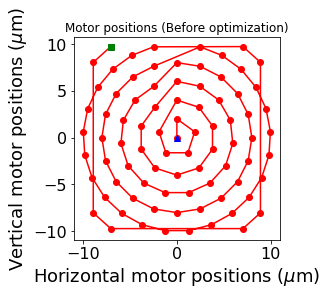

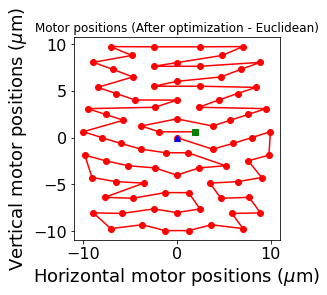

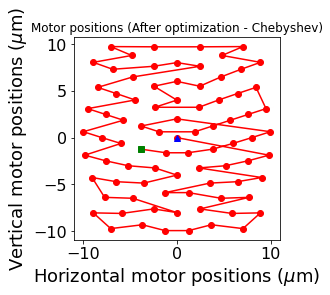

In [46]:
# display plots
plt.close('all')
multiplier = 1 # in case of change of units
# display figures
# before optimization
fig1 = plt.figure(1)
plt.clf()
ax1 = fig1.add_subplot(111)
im1 = ax1.plot(pl[:,0]*multiplier,pl[:,1]*multiplier,'ro-')
ax1.plot(pl[:,0][0]*multiplier,pl[:,1][0]*multiplier,'b^-')
ax1.plot(pl[:,0][-1]*multiplier,pl[:,1][-1]*multiplier,'gs-')
ax1.set_xlabel('Horizontal motor positions ($\mu$m)',fontsize = 18)
ax1.set_ylabel('Vertical motor positions ($\mu$m)',fontsize = 18)
ax1.set_title('Motor positions (Before optimization)')
ax1.tick_params(labelsize = 16)
plt.axis('image')
plt.tight_layout()
plt.show(block=False)
#plt.savefig('grid_calculated_nooptim_{}x{}_{}.png'.format(params['hrange'],
#            params['vrange'],params['step_size']),bbox_inches='tight',dpi=200)

# After optimization (Euclidean)
fig2 = plt.figure(2)
plt.clf()
ax2 = fig2.add_subplot(111)
im2 = ax2.plot(plopte[:,0]*multiplier,plopte[:,1]*multiplier,'ro-')
ax2.plot(plopte[:,0][0]*multiplier,plopte[:,1][0]*multiplier,'b^-')
ax2.plot(plopte[:,0][-1]*multiplier,plopte[:,1][-1]*multiplier,'gs-')
ax2.set_xlabel('Horizontal motor positions ($\mu$m)',fontsize = 18)
ax2.set_ylabel('Vertical motor positions ($\mu$m)',fontsize = 18)
ax2.set_title('Motor positions (After optimization - Euclidean)')
ax2.tick_params(labelsize = 16)
plt.axis('image')
plt.tight_layout()
plt.show(block=False)
#plt.savefig('grid_optimized_Euclidean_{}x{}_{}.png'.format(params['hrange'],
#            params['vrange'],params['step_size']),bbox_inches='tight',dpi=200)

# After optimization (Chebyshev)
fig3 = plt.figure(3)
plt.clf()
ax3 = fig3.add_subplot(111)
im3 = ax3.plot(ploptc[:,0]*multiplier,ploptc[:,1]*multiplier,'ro-')
ax3.plot(ploptc[:,0][0]*multiplier,ploptc[:,1][0]*multiplier,'b^-')
ax3.plot(ploptc[:,0][-1]*multiplier,ploptc[:,1][-1]*multiplier,'gs-')
ax3.set_xlabel('Horizontal motor positions ($\mu$m)',fontsize = 18)
ax3.set_ylabel('Vertical motor positions ($\mu$m)',fontsize = 18)
ax3.set_title('Motor positions (After optimization - Chebyshev)')
ax3.tick_params(labelsize = 16)
plt.axis('image')
plt.tight_layout()
plt.show(block=False)
#plt.savefig('grid_optimized_Chebyshev_{}x{}_{}.png'.format(params['hrange'],
#            params['vrange'],params['step_size']),bbox_inches='tight',dpi=200)